### Simple ###

In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt  

In [2]:
x1=np.array([19, 39, 30, 30, 15, 15, 15, 30])
#x1_scale = preprocessing.scale(x1)
x2=np.array([63, 74, 87, 23, 35, 43, 32, 73])
#x2_scale = preprocessing.scale(x2)
#print(x1_scale,x2_scale)

In [3]:
X1 = []
for i in range(0,8):
    #print(i)
    a = x1[i]- x1.mean()
    #print(a)
    X1.append(a)
X1

[-5.125, 14.875, 5.875, 5.875, -9.125, -9.125, -9.125, 5.875]

In [4]:
X2 = []
for i in range(0,8):
    #print(i)
    a = x2[i]- x2.mean()
    #print(a)
    X2.append(a)
X2

[9.25, 20.25, 33.25, -30.75, -18.75, -10.75, -21.75, 19.25]

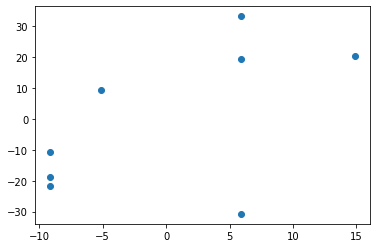

In [5]:
plt.plot(X1,X2,'o')  

In [6]:
data=np.matrix([[X1[i],X2[i]] for i in range(len(X1))])
data

matrix([[ -5.125,   9.25 ],
        [ 14.875,  20.25 ],
        [  5.875,  33.25 ],
        [  5.875, -30.75 ],
        [ -9.125, -18.75 ],
        [ -9.125, -10.75 ],
        [ -9.125, -21.75 ],
        [  5.875,  19.25 ]])

In [14]:
XXT = data.T*data
XXT

matrix([[ 600.875,  849.25 ],
        [ 849.25 , 3857.5  ]])

In [16]:
cov=np.cov(XXT)
cov

array([[  30845.0703125,  373587.046875 ],
       [ 373587.046875 , 4524784.03125  ]])

array([[  30845.0703125,  373587.046875 ],
       [ 373587.046875 , 4524784.03125  ]])

In [54]:
-0.97*75+482*0.24

42.92999999999999

### Edited by LI Jie ###

In [1]:
###  在Ipython编译器里直接使用，功能是可以内嵌绘图，并省略掉plt.show()这一步。
### 注意是在IPython编译器中，Pycharm里没有这个用法
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### seaborn库  很有用  可画出更丰富的图   matplotlib的补充 
### https://www.cnblogs.com/chickenwrap/p/10066468.html
import seaborn as sns; sns.set()

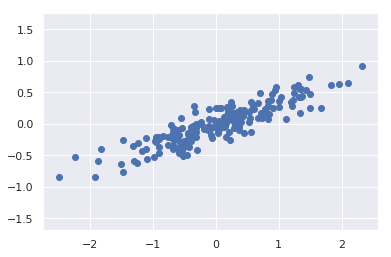

In [2]:
###  0-1的伪随机数生成器 
rng = np.random.RandomState(1)

###  rng.uniform(1,2,(3,4))  产生一个3行4列的数组，其中每个元素都是在[1,2]区间内均匀分布的随机数
###  randn(d0, d1, …, dn)是从标准正态分布中返回一个或多个样本值 dn是第n维的大小
###  rand(d0, d1, …, dn)的随机样本位于[0, 1)中
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

###  绘制散点图，
plt.scatter(X[:, 0], X[:, 1])

###  https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/axis_equal_demo.html
plt.axis('equal'); #Set equal scaling by changing axis limits.

In [3]:
###  X : [   rng.rand(2, 2) x rng.randn(2, 200)  ]  .T
###       [       2行2列   x    2行200列  ]  .T
###            [       2行200列  ]  .T
###            [       200行2列  ]
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

In [4]:
###   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

###   n_components:  PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
pca = PCA(n_components=2)
pca.fit(X)
###  whiten:    对降维后的数据的每个特征进行归一化,使得每个特征具有相同的方差。

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
###   components_ ：返回具有最大方差的成分。
print(pca.components_)

[[-0.94446029 -0.32862557]

 [-0.32862557  0.94446029]]


In [6]:
###   explained_variance_，降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分。
print(pca.explained_variance_)

[0.7625315 0.0184779]


0.7625315008826115 [-0.94446029 -0.32862557]

0.01847789551356258 [-0.32862557  0.94446029]


Text(0, 0.5, 'y')

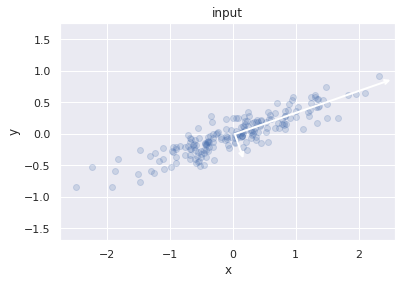

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)

 # Annotate the point v1 with blank text ''.
 # Optionally, the text can be displayed in another position v0.
 # An arrow pointing from the text to the annotated point v1 can then
 # be added by defining *arrowprops*.
    
###   https://matplotlib.org/3.1.1/tutorials/text/annotations.html#plotting-guide-annotation
###   An arrow connecting two points (xy & xytext) can be optionally drawn by specifying the arrowprops argument. 
###   To draw only an arrow, use empty string as the first argument.
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

#zip return a zip object whose .__next__() method returns a tuple where the i-th element comes from the i-th iterable argument.
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length, vector)
    v = vector * 3 * np.sqrt(length)
###    均值点 到 距离均值最远点  的向量  
    draw_vector(pca.mean_, pca.mean_ - v)
        
plt.axis('equal');

plt.title('input')
plt.xlabel('x')
plt.ylabel('y')

 ### Dimensionality Reduction

In [8]:
np.zeros(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

original shape:  (200, 2)

transformed shape: (200, 1)


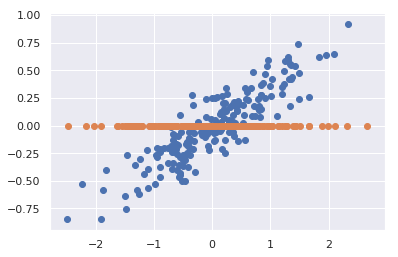

In [9]:
###   降为一维
pca = PCA(n_components=1)
pca.fit(X)

#pca变换
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

plt.scatter(X[:,0],X[:,1])
plt.scatter(X_pca,np.zeros(200))

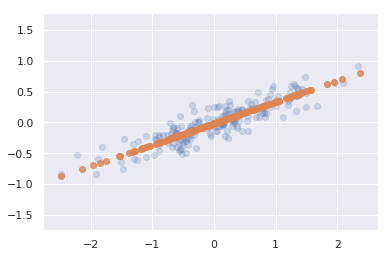

In [10]:
#pca反变换
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
#黄色点是pca向量的投影点 蓝色是原始数据点 大大缩小了数据量

### PCA for visualization: Hand-written digits

In [11]:
###  加载sklearn包里自带的手写数字数据集
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape 

(1797, 64)

In [12]:
###  the data consists of 8×8 pixel images, meaning that they are 64-dimensional

pca = PCA(2) # project from 64 to 2 dimensions 降维    #find basis functions that are more efficient
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)

(1797, 2)


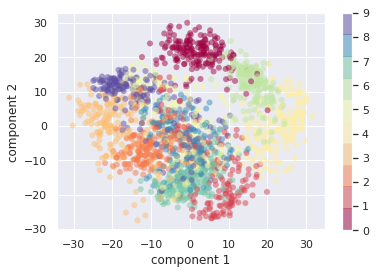

In [13]:
###  画出2维主向量的投影范围
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Choosing the number of components

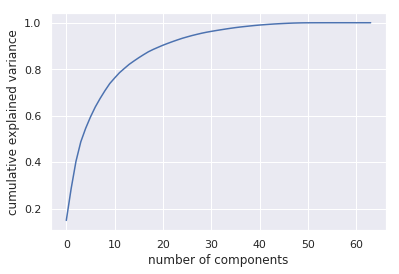

In [14]:
# PCA(n_components),
# If ``n_components > 1``, represents number of components to keep, n_components == min(n_samples, n_features)
# If ``0 < n_components < 1`` select the number of components such that the amount of variance that needs to be
# explained is greater than the percentage specified by n_components.

# If n_components is not set all components are kept

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


###   first 10 components contain approximately 75% of the variance
###   while you need around 50 components to describe close to 100% of the variance

### PCA as Noise Filtering

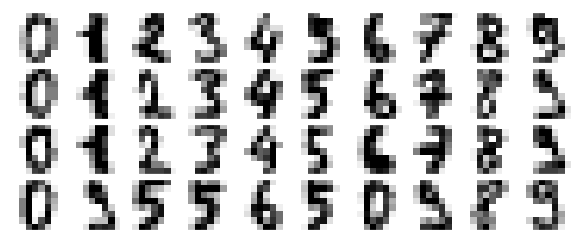

In [15]:
###   noise-free data
def plot_digits(data):
    
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
    #reshape to 8 * 8 size
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),cmap='binary', interpolation='nearest',clim=(0, 16))
        
plot_digits(digits.data)


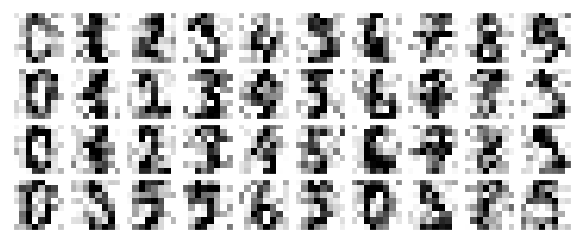

In [16]:
###   add some random noise to create a noisy dataset
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [17]:
###   requesting that the projection preserve 50% of the variance
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

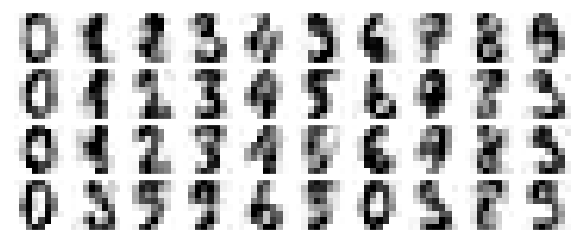

In [18]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

**The use of principal component analysis:**  
dimensionality reduction  
visualization of high-dimensional data  
noise filtering  
feature selection within high-dimensional data  
  

PCA's main weakness is that it tends to be highly affected by **outliers** in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.